In [1]:
import numpy as np
import pickle as pk
import qiskit as qk
from qiskit import IBMQ, Aer
import qiskit.providers.aer.noise as noise
import warnings
import random
        
backendQASM = Aer.get_backend('qasm_simulator')
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backendSanti = provider.get_backend('ibmq_santiago')
noise_model = noise.NoiseModel.from_backend(backendSanti)

noise_model = noise.NoiseModel()
t1 = 30000
t2 = 30000
time_u3 = 500 # (two X90 pulses)
errors_u3 = noise.thermal_relaxation_error(t1, t2, time_u3)
noise_model.add_quantum_error(errors_u3, 'u3', [0])

# error = noise.depolarizing_error(0.05, 1)
# noise_model.add_all_qubit_quantum_error(error, ['u3'])

qr = qk.QuantumRegister(1)
cr = qk.ClassicalRegister(1)

def u3Circ(theta, phi, lamda):
    circ = qk.QuantumCircuit(qr,cr)
    for k in range(len(theta)):
        circ.u3(theta[k], phi[k], lamda[k], 0)
    circ.measure(0,0)
    return circ

def getProb(state, counts, shots):
    if state in counts.keys(): return counts[state]/shots
    else: return 0
    
qk.__version__

C:\Users\kzhang\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


'0.15.1'

In [2]:
num_gates, data_size, shots = 100, 100, 8192
X = []
for k in range(1, num_gates+1):
    for n in range(data_size):
        temp = []
        for _ in range(k):
            temp += [round(np.random.rand()*2*np.pi-np.pi, 5), 
                     round(np.random.rand()*2*np.pi-np.pi, 5),
                     round(np.random.rand()*2*np.pi-np.pi, 5)]
        X.append(temp)
random.shuffle(X)

In [3]:
circ_list = []
for x in X:
    circ_list.append(u3Circ(x[::3], x[1::3], x[2::3]))
len(circ_list)

10000

In [4]:
results = qk.execute(circ_list, backend=backendQASM, noise_model=noise_model, shots=shots, optimization_level=0).result()

In [5]:
Y = [getProb('0', results.get_counts(k), shots) for k in range(num_gates*data_size)]

In [6]:
for k in range(len(X)):
    X[k] = X[k] + [0.0]*(300-len(X[k]))

In [7]:
with open('dataset_qasm2.p', 'wb') as f:
    pk.dump({'X':X,'Y':Y}, f)

In [93]:
data_size, shots = 10000, 8192
for c in range(1, 2):
    print(c)
    num_gates = c
    X, circ_list = [], []
    for k in range(data_size):
        temp = []
        for n in range(num_gates):
            temp += [np.random.rand()*2*np.pi-np.pi, 
                     np.random.rand()*2*np.pi-np.pi,
                     np.random.rand()*2*np.pi-np.pi]
        circ_list.append(u3Circ(temp[::3], temp[1::3], temp[2::3]))
        X.append(temp)
    results = qk.execute(circ_list, backend=backendQASM, noise_model=noise_model, shots=shots, optimization_level=0).result()
    Y = [getProb('0', results.get_counts(k), shots) for k in range(data_size)]
    with open('data_set_'+str(num_gates)+'gates_noisy_santiago.p', 'wb') as f:
        pk.dump({'X':X,'Y':Y}, f)

1


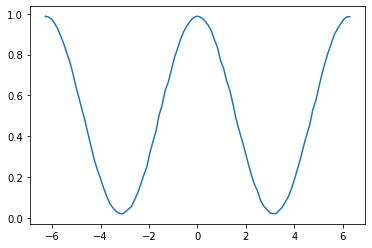

In [92]:
t = np.linspace(-2*np.pi, 2*np.pi, 100)
circs = [u3Circ([th], [0], [0]) for th in t]
results = qk.execute(circs, backend=backendQASM, noise_model=noise_model, shots=shots, optimization_level=0).result()
ys = [getProb('0', results.get_counts(k), shots) for k in range(len(t))]
plt.plot(t, ys)

In [23]:
X[0]

[2.26673,
 1.08379,
 2.15426,
 -0.69392,
 -2.4406,
 -3.14133,
 1.14768,
 2.53202,
 -0.2871,
 2.03991,
 -0.26079,
 3.10666,
 1.4202,
 -0.59566,
 -2.3503,
 3.07815,
 -1.09153,
 0.8283,
 1.79042,
 2.74911,
 0.92089,
 0.31095,
 -2.67835,
 -2.43673,
 -1.44438,
 2.30938,
 -2.78341,
 0.3055,
 -2.20702,
 2.55636,
 2.41359,
 0.89036,
 1.44702,
 -1.90707,
 -0.77864,
 0.86157,
 1.31588,
 -1.3771,
 1.7585,
 3.08478,
 -1.23873,
 -2.64699,
 0.20533,
 -0.31769,
 2.8518,
 -3.07038,
 0.81989,
 0.92237,
 -3.12148,
 0.27684,
 0.19965,
 1.6473,
 -0.00937,
 -2.58303,
 -0.4457,
 -0.54666,
 2.53846,
 -3.04467,
 2.07026,
 -0.17545,
 -0.68518,
 -0.66576,
 -0.49561,
 -1.61063,
 1.14011,
 -1.536,
 1.43484,
 -1.28784,
 -2.24846,
 0.79055,
 -2.48804,
 -1.22687,
 -0.11646,
 -1.30183,
 -1.68982,
 -0.83644,
 2.90661,
 -0.48904,
 -0.03015,
 -0.20714,
 1.12817,
 1.71074,
 0.30983,
 3.13703,
 1.82337,
 2.54189,
 -0.07653,
 -1.49516,
 -0.89545,
 -0.81269,
 -2.05609,
 -0.84293,
 -1.63555,
 -1.82195,
 0.68456,
 -0.85731,
 